# Lab 5 
## Assignment 1: Regression, predictions
## by Denis Khryashchev (dk2926)

In [81]:
# Importing libraries to read and store data, perform statistical analysis
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import os
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
# Reading the Census data in males and females dictionaries
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
# 08_2 files are male, 08_3 are female

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9) #%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [16]:
# Printing the allmales salaries
print allmales['all'].columns
print allmales
#df = pd.DataFrame.from_dict(allmales['all'])
#scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [14]:
# Removing non-real entries for males and females
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[25411.0, 35228.0, 24855.0, 40122.0, 40153.0]
[17762.0, 22063.0, 20044.0, 23780.0, 24840.0]


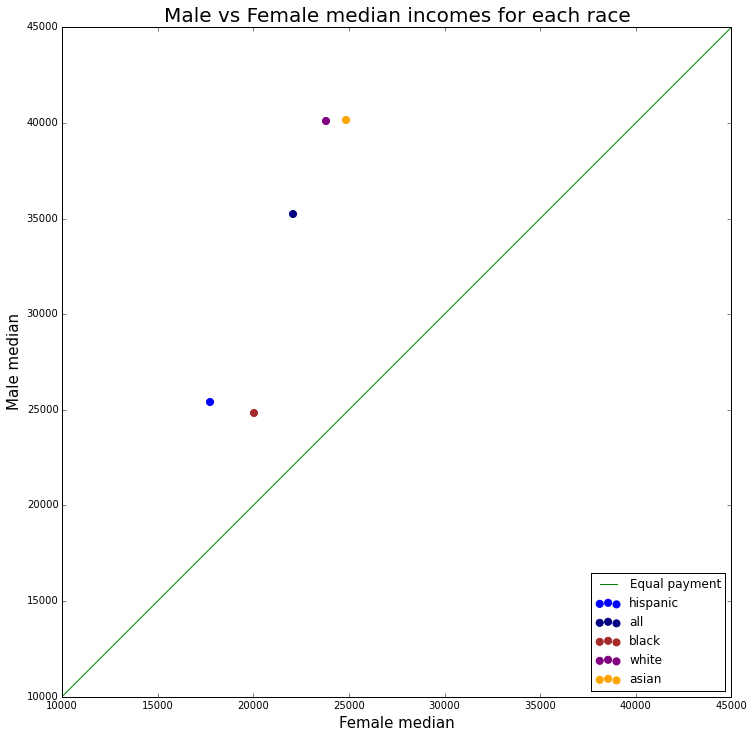

In [105]:
# Reading and plotting male median and female median incomes by races
female_median = []
male_median = []
col = ["Blue", "Navy", "Brown", "Purple", "Orange"]
for k in allmales:
    male_median.append(allmales[k]['Median income'][1])
for k in allfemales:
    female_median.append(allfemales[k]['Median income'][1])
print male_median
print female_median

fig = pl.figure(figsize=(12,12)) 
ax = fig.add_subplot(111)
i = 0
for k in allmales:
    ax.scatter(female_median[i], male_median[i], color=col[i], s=50, label=k)
    i+=1
ax.set_xlim(1e4, 4.5e4)
ax.set_ylim(1e4, 4.5e4)
plot1 = ax.plot([1e4,4.5e4], [1e4,4.5e4], color = "Green", label = "Equal payment")
ax.legend(loc='lower right')
ax.set_xlabel('Female median', fontsize = 15)
ax.set_ylabel('Male median', fontsize = 15)
ax.set_title('Male vs Female median incomes for each race', fontsize = 20)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Mon, 19 Oct 2015   Prob (F-statistic):             0.0176
Time:                        03:41:12   Log-Likelihood:                -45.843
No. Observations:                   5   AIC:                             95.69
Df Residuals:                       3   BIC:                             94.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -2.112e+04   1.15e+04     -1.841      0.1

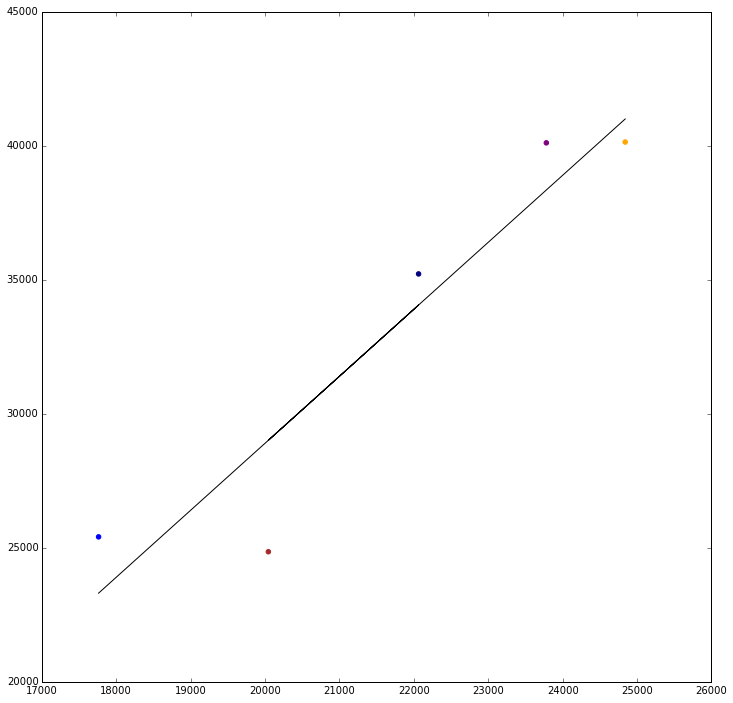

In [106]:
# Fitting the median incomes with a line and plotting it
model = sm.OLS(male_median, sm.add_constant(female_median))
fit = model.fit()
print fit.summary()
intercept, slope = fit.params
print("Slope= %s, intercept= %s" % (slope, intercept))
fig = pl.figure(figsize=(12,12)) 
ax = fig.add_subplot(111)
ax.scatter(female_median, male_median, color=col)
ax.plot(female_median, fit.predict(), 'k')

##it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [97]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)
cor = stats.spearmanr(female_median, male_median)
print cor
beta1=cor[0]*np.std(male_median)/np.std(female_median)
beta0=np.mean(male_median)-beta1*np.mean(female_median)
print "Beta0 = %s, Beta1 = %s"%(beta0, beta1)

SpearmanrResult(correlation=0.90000000000000002, pvalue=0.037386073468498628)
Beta0 = -18816.6882158, Beta1 = 2.39519620495


##and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

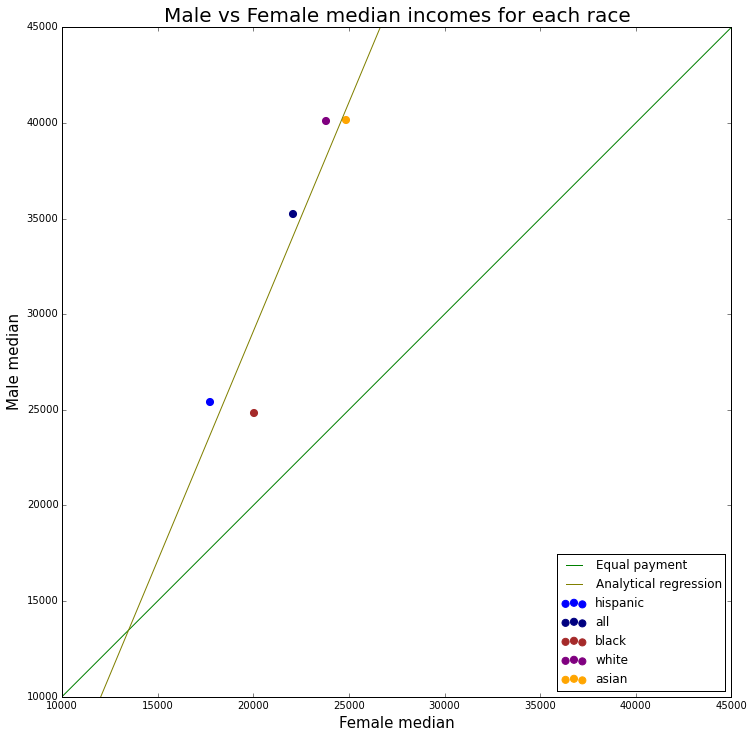

In [110]:
# Plotting the analytical regression
fig = pl.figure(figsize=(12,12)) 
ax = fig.add_subplot(111)
i = 0
for k in allmales:
    ax.scatter(female_median[i], male_median[i], color=col[i], s=50, label=k)
    i+=1
ax.set_xlim(1e4, 4.5e4)
ax.set_ylim(1e4, 4.5e4)
plot1 = ax.plot([1e4,4.5e4], [1e4,4.5e4], color = "Green", label = "Equal payment")
ax.plot([0, 4.5e4], [0*beta1+beta0, 4.5e4*beta1+beta0], color = "Olive", label = "Analytical regression")
ax.legend(loc='lower right')
ax.set_xlabel('Female median', fontsize = 15)
ax.set_ylabel('Male median', fontsize = 15)
ax.set_title('Male vs Female median incomes for each race', fontsize = 20)

In [104]:
# Calculating the values for other types of income and building a linear regression using them
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())
all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())
allmask = [np.isnan(all_males) + np.isnan(all_females)]
all_females.mask = allmask
all_males.mask = allmask

modelA = sm.OLS(all_males[~all_males.mask], sm.add_constant(all_females[~all_females.mask]))
fit = modelA.fit()
intercept, slope = fit.params
print fit.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Mon, 19 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        03:38:57   Log-Likelihood:                -1743.6
No. Observations:                 178   AIC:                             3491.
Df Residuals:                     176   BIC:                             3498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.5170    561.569     -0.004      0.9

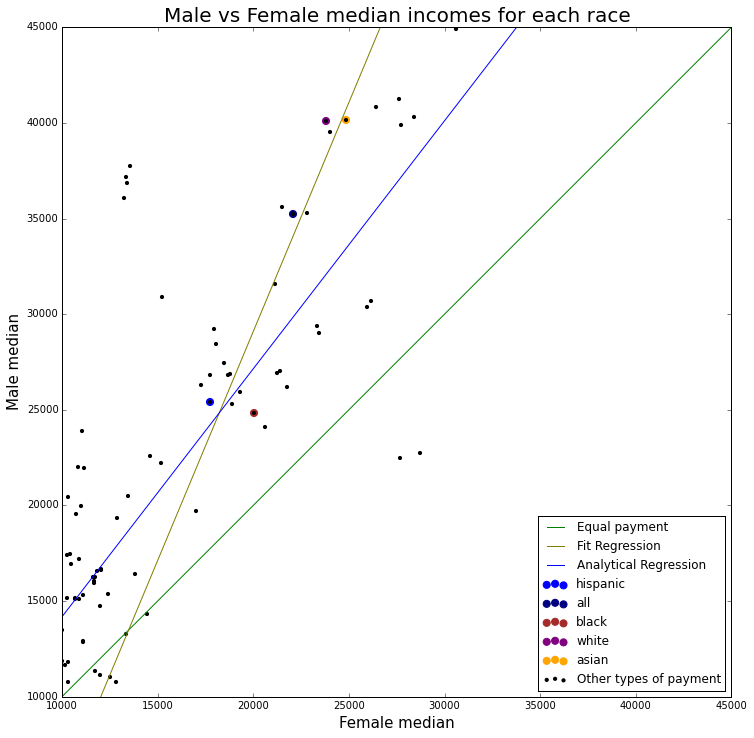

In [119]:
# Plotting the regression
fig = pl.figure(figsize=(12,12)) 
ax = fig.add_subplot(111)
i = 0
for k in allmales:
    ax.scatter(female_median[i], male_median[i], color=col[i], s=50, label=k)
    i+=1
ax.scatter(all_females, all_males, s=10, color='Black', label = "Other types of payment")
ax.set_xlim(1e4, 4.5e4)
ax.set_ylim(1e4, 4.5e4)
plot1 = ax.plot([1e4,4.5e4], [1e4,4.5e4], color = "Green", label = "Equal payment")
ax.plot([0, 4.5e4], [0*beta1+beta0, 4.5e4*beta1+beta0], color = "Olive", label = "Fit Regression")
cor = stats.spearmanr(all_females, all_males)
beta1=cor[0]*np.std(all_males)/np.std(all_females)
beta0=np.mean(all_males)-beta1*np.mean(all_females)
ax.plot([0, 4.5e4], [0*beta1+beta0, 4.5e4*beta1+beta0], color = "Blue", label = "Analytical Regression")
ax.legend(loc='lower right')
ax.set_xlabel('Female median', fontsize = 15)
ax.set_ylabel('Male median', fontsize = 15)
ax.set_title('Male vs Female median incomes for each race', fontsize = 20)

## Answers to the questions:
### 1. The regression lines for median and all types of income lines are not similar. The median income has a bigger slope of the line - 2.5 vs 1.4 for the all types of income.
### 2. Predicting a stipend

In [128]:
# Predicting the stipend
idealStipend = 150000
womanStipend = (idealStipend)/1.4
print womanStipend

107142.857143


### 3. Things that I notice. Asian and white males earn about 1.4 of the money that females of the same races earn.
### The difference for black and hispanic races is less than for white and asian ones.